In [10]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

# Load CSV from Google Drive
file_path = "/content/drive/MyDrive/spambase_csv.csv"  # Change to your path
df = pd.read_csv(file_path)

print("Dataset Shape:", df.shape)
print(df.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset Shape: (4601, 58)
   word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0            0.00               0.64           0.64           0.0   
1            0.21               0.28           0.50           0.0   
2            0.06               0.00           0.71           0.0   
3            0.00               0.00           0.00           0.0   
4            0.00               0.00           0.00           0.0   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0           0.32            0.00              0.00                0.00   
1           0.14            0.28              0.21                0.07   
2           1.23            0.19              0.19                0.12   
3           0.63            0.00              0.31                0.63   
4           0.63            0.00              0.31          

In [13]:
# Step 2: Basic Info & Missing Values
print("\nDataset Info:")
print(df.info())

print("\nMissing Values per Column:")
print(df.isnull().sum())

# Change 'label' if your dataset uses another name for spam/ham column
label_col = 'class'


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report  

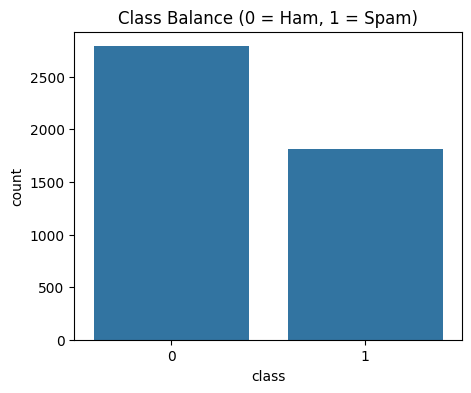

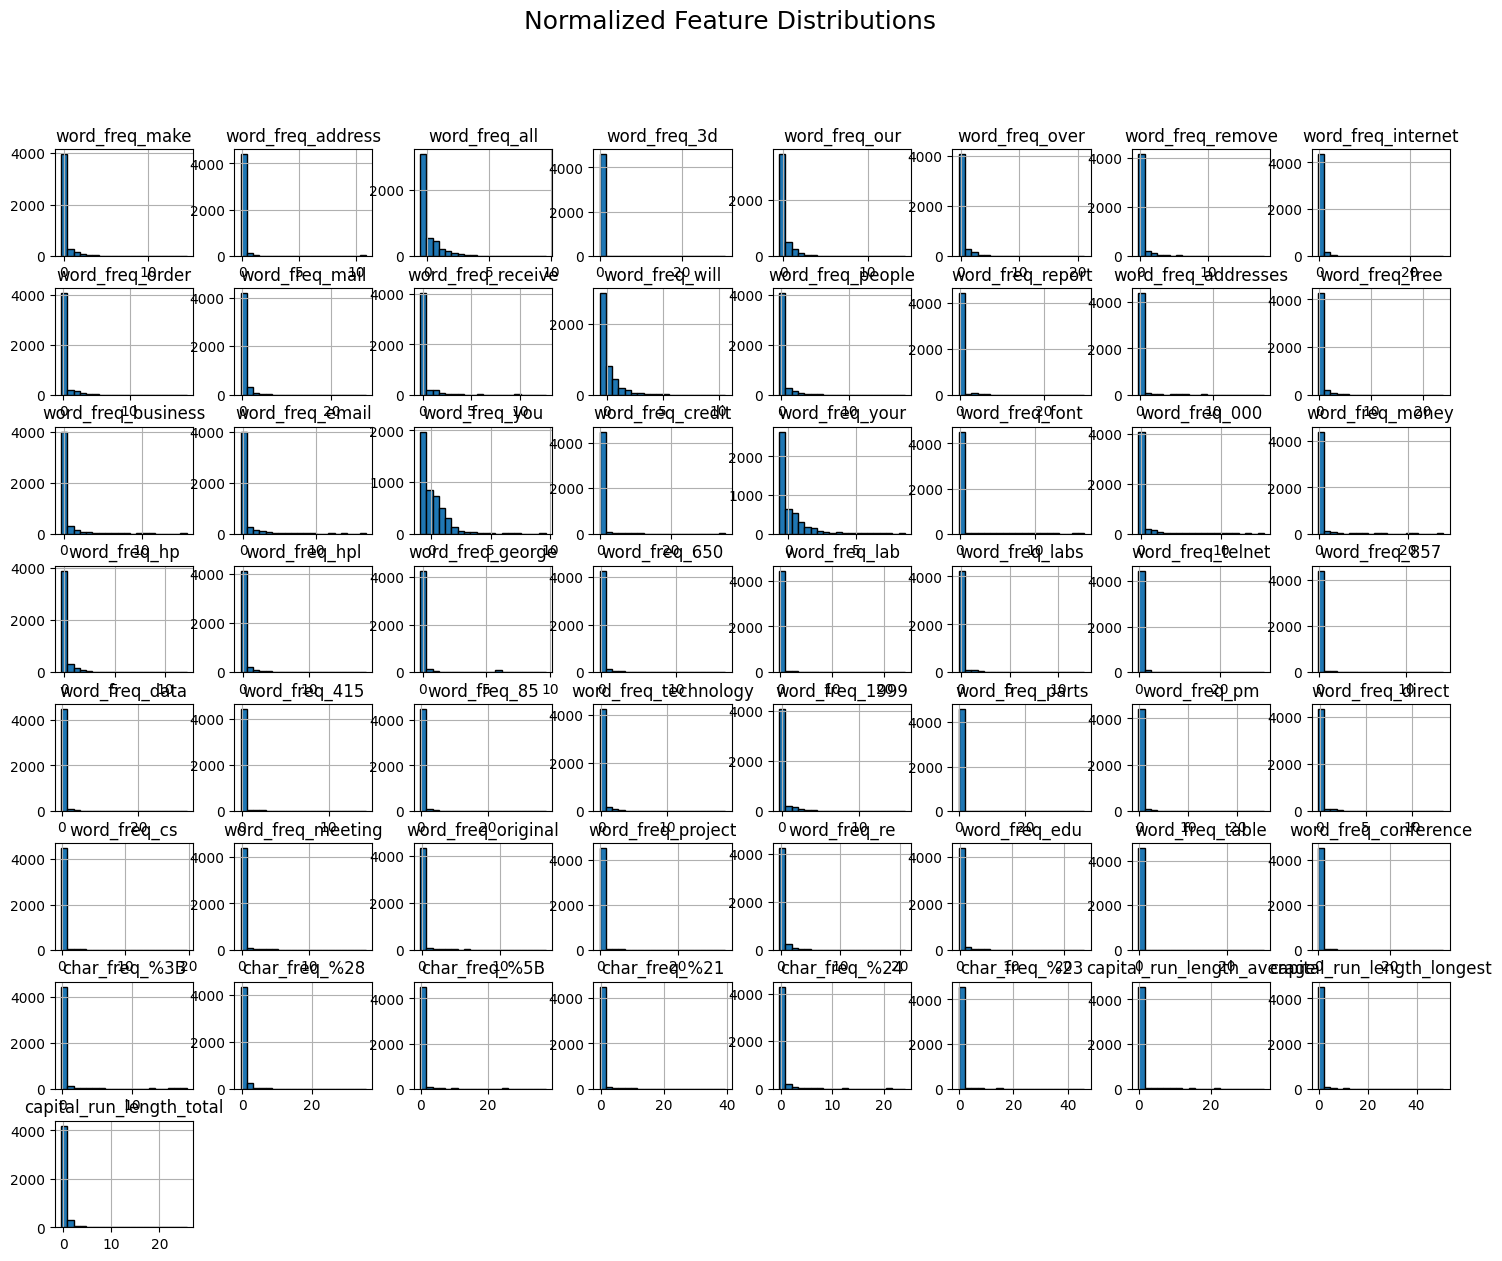

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Step 1: Split features and target
X = df.drop(columns=[label_col])
y = df[label_col]

# Step 2: Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

plt.figure(figsize=(5, 4))
sns.countplot(x=y)
plt.title("Class Balance (0 = Ham, 1 = Spam)")
plt.show()

# Optional: Histogram of features
X_df = pd.DataFrame(X_scaled, columns=X.columns)
X_df.hist(figsize=(18, 14), bins=20, edgecolor='black')
plt.suptitle("Normalized Feature Distributions", fontsize=18)
plt.show()

In [25]:
# Step 5: Models
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

models = {
    "GaussianNB": GaussianNB(),
    "KNN (k=5)": KNeighborsClassifier(n_neighbors=5),
    "SVM Linear": SVC(kernel='linear'),
    "SVM Poly": SVC(kernel='poly', degree=3),
    "SVM RBF": SVC(kernel='rbf'),
    "SVM Sigmoid": SVC(kernel='sigmoid')
}

In [21]:
# Step 4: Split Data into Training and Testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42, stratify=y)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (3450, 57)
X_test shape: (1151, 57)
y_train shape: (3450,)
y_test shape: (1151,)



GaussianNB:
               precision    recall  f1-score   support

           0       0.96      0.74      0.84       697
           1       0.71      0.95      0.81       454

    accuracy                           0.83      1151
   macro avg       0.83      0.85      0.82      1151
weighted avg       0.86      0.83      0.83      1151



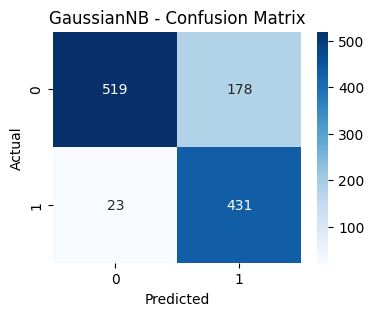


KNN (k=5):
               precision    recall  f1-score   support

           0       0.91      0.92      0.92       697
           1       0.88      0.86      0.87       454

    accuracy                           0.90      1151
   macro avg       0.89      0.89      0.89      1151
weighted avg       0.90      0.90      0.90      1151



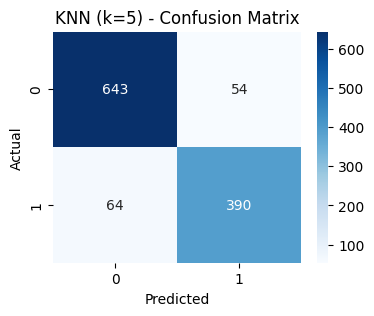


SVM Linear:
               precision    recall  f1-score   support

           0       0.93      0.96      0.94       697
           1       0.93      0.89      0.91       454

    accuracy                           0.93      1151
   macro avg       0.93      0.92      0.93      1151
weighted avg       0.93      0.93      0.93      1151



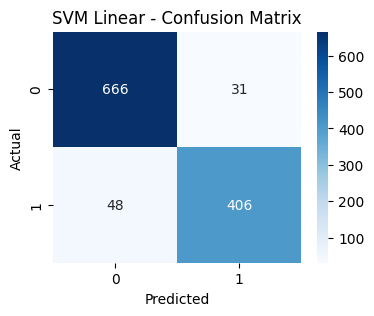


SVM Poly:
               precision    recall  f1-score   support

           0       0.74      0.99      0.84       697
           1       0.96      0.45      0.62       454

    accuracy                           0.78      1151
   macro avg       0.85      0.72      0.73      1151
weighted avg       0.82      0.78      0.75      1151



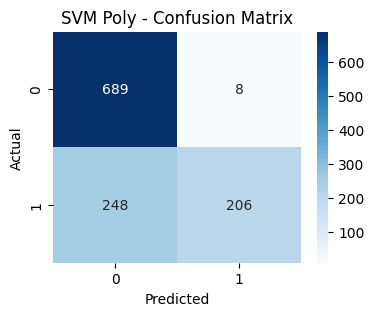


SVM RBF:
               precision    recall  f1-score   support

           0       0.93      0.96      0.94       697
           1       0.93      0.88      0.91       454

    accuracy                           0.93      1151
   macro avg       0.93      0.92      0.92      1151
weighted avg       0.93      0.93      0.93      1151



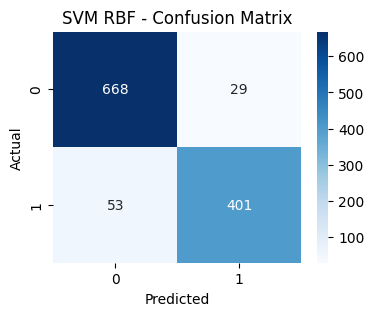


SVM Sigmoid:
               precision    recall  f1-score   support

           0       0.90      0.91      0.91       697
           1       0.86      0.84      0.85       454

    accuracy                           0.88      1151
   macro avg       0.88      0.88      0.88      1151
weighted avg       0.88      0.88      0.88      1151



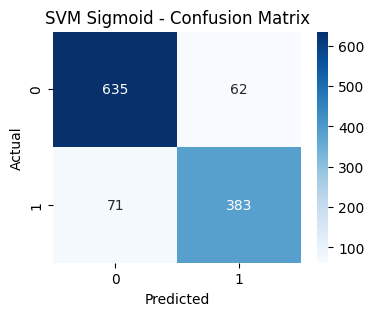

In [26]:
# Step 6: Training & Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results[name] = [acc, prec, rec, f1]

    print(f"\n{name}:\n", classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

In [27]:
# Step 7: Cross-Validation
from sklearn.model_selection import StratifiedKFold, cross_val_score

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
print("\n=== K-Fold Cross-Validation ===")
for name, model in models.items():
    scores = cross_val_score(model, X_scaled, y, cv=kfold, scoring='accuracy')
    print(f"{name} - Mean Accuracy: {scores.mean():.4f} (+/- {scores.std():.4f})")



=== K-Fold Cross-Validation ===
GaussianNB - Mean Accuracy: 0.8155 (+/- 0.0091)
KNN (k=5) - Mean Accuracy: 0.9087 (+/- 0.0088)
SVM Linear - Mean Accuracy: 0.9261 (+/- 0.0056)
SVM Poly - Mean Accuracy: 0.7783 (+/- 0.0093)
SVM RBF - Mean Accuracy: 0.9322 (+/- 0.0062)
SVM Sigmoid - Mean Accuracy: 0.8844 (+/- 0.0066)



=== Model Performance Summary ===
             Accuracy  Precision    Recall  F1-Score
GaussianNB   0.825369   0.707718  0.949339  0.810913
KNN (k=5)    0.897480   0.878378  0.859031  0.868597
SVM Linear   0.931364   0.929062  0.894273  0.911336
SVM Poly     0.777585   0.962617  0.453744  0.616766
SVM RBF      0.928758   0.932558  0.883260  0.907240
SVM Sigmoid  0.884448   0.860674  0.843612  0.852058


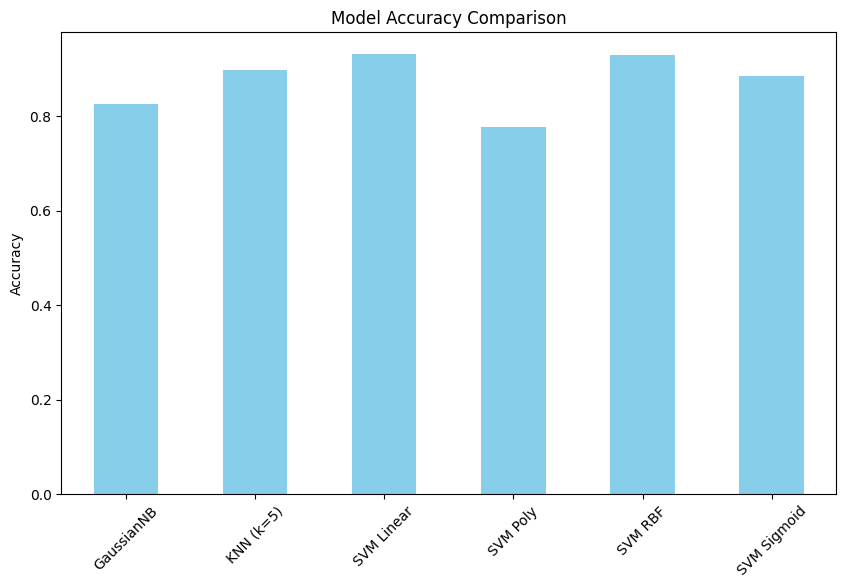

In [28]:
# Step 8: Summary Table & Visualization
results_df = pd.DataFrame(results, index=["Accuracy", "Precision", "Recall", "F1-Score"]).T
print("\n=== Model Performance Summary ===")
print(results_df)

plt.figure(figsize=(10,6))
results_df["Accuracy"].plot(kind='bar', color='skyblue')
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.show()
